In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
payroll = pd.read_csv("data/bookstore_payroll.csv")
payroll.head()

,pay_period_start,employee_id,employee_name,location,role,employment_type,hourly_rate,hours_biweekly,gross_pay,cpp_withheld,ei_withheld,income_tax_withheld,employee_benefits,net_pay,dataset
0,2019-11-11,1001,Harper Brown,YYC-DT,Store Manager,PERM,27.49,80.27,2206.62,114.74,35.31,264.79,44.13,1747.65,bookstore_payroll
1,2019-11-25,1001,Harper Brown,YYC-DT,Store Manager,PERM,27.49,76.56,2104.63,109.44,33.67,252.56,42.09,1666.87,bookstore_payroll
2,2019-12-09,1001,Harper Brown,YYC-DT,Store Manager,PERM,27.49,78.97,2170.89,112.89,34.73,260.51,43.42,1719.34,bookstore_payroll
3,2019-12-23,1001,Harper Brown,YYC-DT,Store Manager,PERM,27.49,72.70,1998.52,103.92,31.98,239.82,39.97,1582.83,bookstore_payroll
4,2020-01-06,1001,Harper Brown,YYC-DT,Store Manager,PERM,27.49,50.45,1386.87,72.12,22.19,166.42,27.74,1098.40,bookstore_payroll


In [38]:
payroll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6640 entries, 0 to 6639
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pay_period_start     6640 non-null   object 
 1   employee_id          6640 non-null   int64  
 2   employee_name        6640 non-null   object 
 3   location             6640 non-null   object 
 4   role                 6640 non-null   object 
 5   employment_type      6640 non-null   object 
 6   hourly_rate          6640 non-null   float64
 7   hours_biweekly       6640 non-null   float64
 8   gross_pay            6640 non-null   float64
 9   cpp_withheld         6640 non-null   float64
 10  ei_withheld          6640 non-null   float64
 11  income_tax_withheld  6640 non-null   float64
 12  employee_benefits    6640 non-null   float64
 13  net_pay              6640 non-null   float64
 14  dataset              6640 non-null   object 
dtypes: float64(8), int64(1), object(6)
mem

In [39]:
payroll["pay_period_start"] = pd.to_datetime(payroll["pay_period_start"])

In [40]:
features = [
    "hourly_rate",
    "hours_biweekly",
    "gross_pay",
    "net_pay",
    "employee_benefits",
    "income_tax_withheld"
]

In [41]:
from sklearn.preprocessing import StandardScaler

X = payroll[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

compara a todos los empleados entre sí

In [42]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(
    n_estimators=200,
    contamination=0.02,   # ~2% anomalías (razonable)
    random_state=42
)

payroll["anomaly"] = iso.fit_predict(X_scaled)

In [43]:
anomalies = payroll[payroll["anomaly"] == -1]
anomalies.shape

(132, 16)

In [44]:
anomalies["employee_id"].value_counts().head(10)

employee_id
1019    49
1033    48
1001    15
1034     6
1012     3
1026     2
1045     2
1002     1
1014     1
1029     1
Name: count, dtype: int64

In [45]:
anomalies["role"].value_counts()

role
Store Manager            112
Seasonal Associate        12
Assistant Manager          7
E‑Commerce Specialist      1
Name: count, dtype: int64

In [46]:
anomalies[features].describe()

,hourly_rate,hours_biweekly,gross_pay,net_pay,employee_benefits,income_tax_withheld
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,29.681894,73.794697,2256.070758,1787.327803,44.601591,270.728485
std,4.431852,18.887479,641.516107,506.472341,14.444150,76.982361
min,16.270000,16.000000,260.320000,211.370000,0.000000,31.240000
25%,27.490000,74.815000,2329.117500,1844.665000,46.585000,279.490000
50%,31.570000,78.180000,2414.105000,1911.970000,48.280000,289.695000
75%,32.170000,82.945000,2527.837500,2002.040000,50.560000,303.342500
max,32.170000,90.000000,2841.300000,2250.300000,56.830000,340.960000


In [47]:
payroll[features].describe()

,hourly_rate,hours_biweekly,gross_pay,net_pay,employee_benefits,income_tax_withheld
count,6640.000000,6640.000000,6640.000000,6640.000000,6640.000000,6640.000000
mean,19.189250,51.295511,1019.590709,814.988413,12.919256,122.350901
std,3.639022,15.508994,470.241863,367.366669,15.262068,56.429027
min,16.000000,16.000000,260.320000,211.370000,0.000000,31.240000
25%,16.840000,38.717500,657.947500,534.257500,0.000000,78.950000
50%,17.710000,48.225000,838.390000,679.365000,0.000000,100.610000
75%,19.950000,65.232500,1318.542500,1044.290000,26.370000,158.222500
max,32.170000,90.000000,2841.300000,2250.300000,56.830000,340.960000


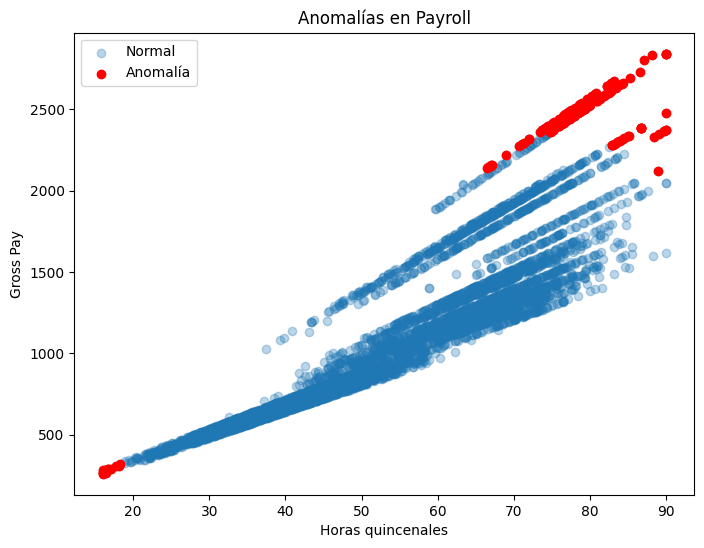

In [48]:
plt.figure(figsize=(8,6))
plt.scatter(
    payroll["hours_biweekly"],
    payroll["gross_pay"],
    alpha=0.3,
    label="Normal"
)

plt.scatter(
    anomalies["hours_biweekly"],
    anomalies["gross_pay"],
    color="red",
    label="Anomalía"
)

plt.xlabel("Horas quincenales")
plt.ylabel("Gross Pay")
plt.legend()
plt.title("Anomalías en Payroll")
plt.show()

compara a cada empleado solo con los de su mismo rol

In [49]:
iso_by_role = {}
results = []

for role, df_role in payroll.groupby("role"):
    if len(df_role) < 50:
        # Evitamos roles con muy pocos registros
        continue

    X = df_role[features]
    scaler = StandardScaler()
    Xs = scaler.fit_transform(X)

    iso = IsolationForest(
        n_estimators=200,
        contamination=0.02,
        random_state=42
    )

    preds = iso.fit_predict(Xs)

    # Guardar scaler+modelo por rol
    iso_by_role[role] = {"scaler": scaler, "model": iso}

    df_role = df_role.copy()
    df_role["anomaly_role"] = preds  # -1 anomalía, 1 normal

    results.append(df_role)

payroll_role_if = pd.concat(results, ignore_index=True)


In [50]:
# Guardar todo en un único pkl
import joblib
joblib.dump(iso_by_role, "payroll_iso_by_role.pkl")

['payroll_iso_by_role.pkl']

In [51]:
payroll_role_if["anomaly_role"].value_counts()

anomaly_role
 1    6505
-1     135
Name: count, dtype: int64

In [52]:
(
    payroll_role_if[payroll_role_if["anomaly_role"] == -1]
    .groupby("role")["employee_id"]
    .count()
    .sort_values(ascending=False)
)

role
Seasonal Associate       74
Bookseller               25
Warehouse Clerk          16
E‑Commerce Specialist     8
Assistant Manager         6
Store Manager             6
Name: employee_id, dtype: int64

In [53]:
(
    payroll_role_if[payroll_role_if["anomaly_role"] == -1]
    .groupby(["role", "employee_id"])
    .size()
    .sort_values(ascending=False)
    .head(10)
)

role                   employee_id
Seasonal Associate     1014           7
                       1012           6
                       1013           5
E‑Commerce Specialist  1044           5
Bookseller             1005           5
Seasonal Associate     1046           5
                       1015           4
Bookseller             1024           4
                       1025           4
Seasonal Associate     1026           4
dtype: int64

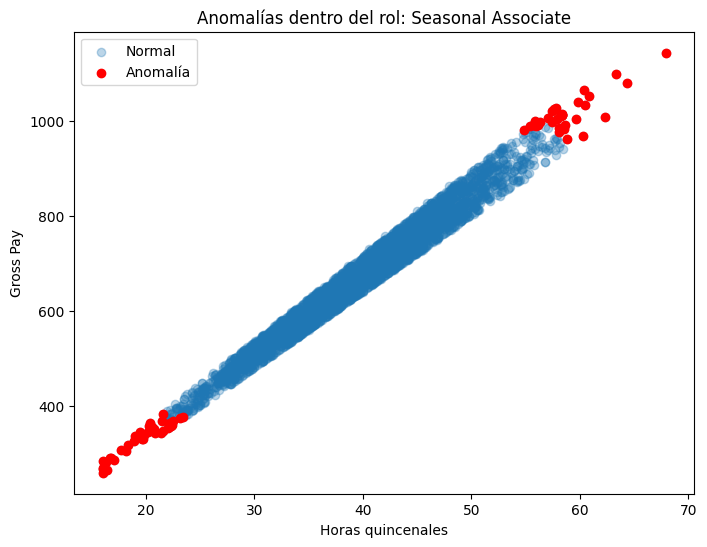

In [54]:
role_name = "Seasonal Associate"
df_r = payroll_role_if[payroll_role_if["role"] == role_name]
anom = df_r[df_r["anomaly_role"] == -1]

plt.figure(figsize=(8,6))
plt.scatter(df_r["hours_biweekly"], df_r["gross_pay"], alpha=0.3, label="Normal")
plt.scatter(anom["hours_biweekly"], anom["gross_pay"], color="red", label="Anomalía")
plt.xlabel("Horas quincenales")
plt.ylabel("Gross Pay")
plt.title(f"Anomalías dentro del rol: {role_name}")
plt.legend()
plt.show()


In [55]:
emp = (
    payroll
    .groupby(["employee_id", "role"], as_index=False)[features]
    .mean()
)

In [56]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(emp[features])

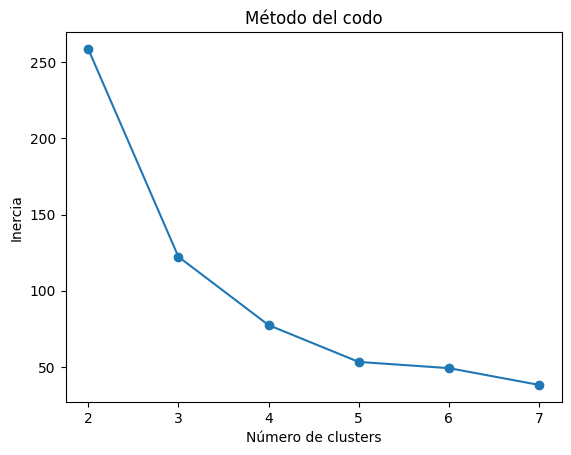

In [57]:
from sklearn.cluster import KMeans

inertia = []

for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(2, 8), inertia, marker="o")
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.title("Método del codo")
plt.show()

In [58]:
kmeans = KMeans(n_clusters=3, random_state=42)
emp["cluster"] = kmeans.fit_predict(X_scaled)

In [59]:
joblib.dump(scaler, "payroll_scaler.pkl")
joblib.dump(kmeans, "payroll_kmeans.pkl")


['payroll_kmeans.pkl']

In [60]:
emp.groupby("cluster")[features].mean()

,hourly_rate,hours_biweekly,gross_pay,net_pay,employee_benefits,income_tax_withheld
cluster,,,,,,
0,16.955634,42.222236,715.963865,581.362605,0.000000,85.915744
1,19.670833,65.617921,1290.732397,1022.260070,25.814620,154.887833
2,27.314444,70.349305,1921.064117,1521.483051,38.421288,230.527690


In [61]:
pd.crosstab(emp["cluster"], emp["role"])

role,Assistant Manager,Bookseller,E‑Commerce Specialist,Seasonal Associate,Store Manager,Warehouse Clerk
cluster,,,,,,
0,0,0,0,142,0,0
1,1,15,0,0,0,8
2,3,0,3,0,3,0


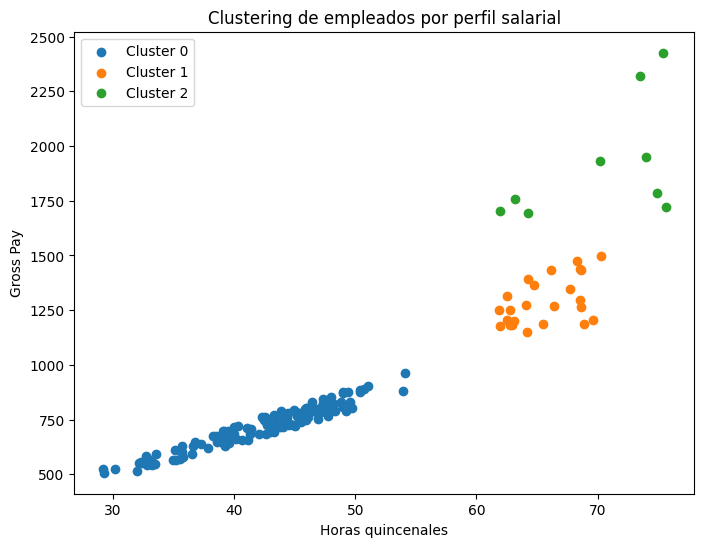

In [62]:
plt.figure(figsize=(8,6))
for c in sorted(emp["cluster"].unique()):
    subset = emp[emp["cluster"] == c]
    plt.scatter(
        subset["hours_biweekly"],
        subset["gross_pay"],
        label=f"Cluster {c}"
    )

plt.xlabel("Horas quincenales")
plt.ylabel("Gross Pay")
plt.legend()
plt.title("Clustering de empleados por perfil salarial")
plt.show()